# **Elo Merchant Category Recommendation**



---



# Table of Contents


>*   [3. Feature Correlation](#section3)
  *   [3.1. Dataset 1 - card_details_train](#section3.1)
  *   [3.2. Dataset 2 - card_details_test](#section3.2)
  *   [3.3. Dataset 3 - merchant_details](#section3.3)
  *   [3.4. Dataset 4 - historical_transactions](#section3.4)
  *   [3.5. Dataset 5 - new_transactions](#section3.5)










---



# Importing Libraries

In [ ]:
# importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, chi2_contingency
import statsmodels.formula.api as smf
from prettytable import PrettyTable
import warnings
warnings.filterwarnings("ignore")

# Loading Datasets

In [ ]:
#ref: https://www.kaggle.com/fabiendaniel/elo-world
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Case Study 1/Data/Dataset/'

In [ ]:
# loading the datasets
%%time
card_details_train = pd.read_csv(dataset_path + 'card_details_train_clean.csv', parse_dates=['first_active_month'])
card_details_test = pd.read_csv(dataset_path + 'card_details_test_clean.csv', parse_dates=['first_active_month'])
merchant_details = pd.read_csv(dataset_path + 'merchant_details_clean.csv')
old_transactions = pd.read_csv(dataset_path + 'old_transactions_clean.csv')
new_transactions = pd.read_csv(dataset_path + 'new_transactions_clean.csv')

print('All preprocessed dataset loaded successfully!')

All preprocessed dataset loaded successfully!
CPU times: user 41.2 s, sys: 11.7 s, total: 52.9 s
Wall time: 1min 12s


In [ ]:
# reduce the memory of all datasets
merchant_details = reduce_mem_usage(merchant_details)
old_transactions = reduce_mem_usage(old_transactions)
new_transactions = reduce_mem_usage(new_transactions)

Mem. usage decreased to 15.64 Mb (72.2% reduction)
Mem. usage decreased to 1166.08 Mb (62.5% reduction)
Mem. usage decreased to 74.88 Mb (64.3% reduction)


<a name='section3'><a/>
# 3. Feature Correlation

**Pearson Correlation:**  
Statistical test between two Continous Variables.

---

**Chi-Square Test:**  
Statistical test between two Categorical variables.

Hypotheses for Chi-square test for independence:  

- Null hypothesis: The two categorical variables are independent (no association between the two variables)   
( H0: Oi = Ei )
- Alternative hypothesis: The two categorical variables are dependent (there is an association between the two variables)   
( H1: Oi ≠ Ei )

---

**ANOVA Test:**   
Statistical test between one Continuous and another Categorical variable.

ANOVA Hypotheses  
- Null hypothesis: Groups means are equal (no variation in means of groups)  
( H0: μ1=μ2=…=μp )
- Alternative hypothesis: At least, one group mean is different from other groups  
( H1: All μ are not equal )

<a name='section3.1'><a/>
## 3.1. Dataset 1: card_details_train

In [ ]:
tot_features = ['card_id', 'first_active_month', 'feature_1', 'feature_2', 'feature_3', 'target']
cat_features = ['first_active_month','feature_1', 'feature_2', 'feature_3']
num_features = ['target']

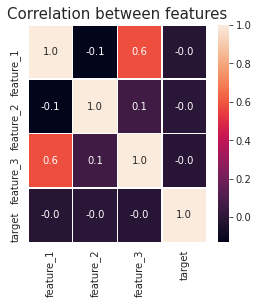

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(card_details_train[tot_features].corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.title('Correlation between features', fontsize=15)
plt.show()

### **Chi-Square Test**

In [ ]:
print('--------------------------------Summary of Chi-Square Test-------------------------------')
x = PrettyTable(['S.No','FEATURE 1', 'FEATURE 2', 'P-VALUE', 'STATUS'])

s_no = 1
for f1 in cat_features:
  for f2 in cat_features:
    if f1 == f2:
      continue
    else:
      ct = pd.crosstab(card_details_train[f1], card_details_train[f2])
      chi_val, p_value, dof, expected = chi2_contingency(ct)
      alpha = 0.05
      if p_value <= alpha:
        status = 'Reject NULL Hypothesis'
      else:
        status = 'Accept NULL Hypothesis'
      x.add_row([s_no, f1, f2, p_value, status])
      s_no = s_no + 1
print(x)

--------------------------------Summary of Chi-Square Test-------------------------------
+------+--------------------+--------------------+-------------------------+------------------------+
| S.No |     FEATURE 1      |     FEATURE 2      |         P-VALUE         |         STATUS         |
+------+--------------------+--------------------+-------------------------+------------------------+
|  1   | first_active_month |     feature_1      |           0.0           | Reject NULL Hypothesis |
|  2   | first_active_month |     feature_2      |           0.0           | Reject NULL Hypothesis |
|  3   | first_active_month |     feature_3      |           0.0           | Reject NULL Hypothesis |
|  4   |     feature_1      | first_active_month |           0.0           | Reject NULL Hypothesis |
|  5   |     feature_1      |     feature_2      |           0.0           | Reject NULL Hypothesis |
|  6   |     feature_1      |     feature_3      |           0.0           | Reject NULL Hypot

### **ANOVA Test**

In [ ]:
anova = smf.ols(formula='target ~ C(first_active_month)', data=card_details_train).fit()
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     13.03
Date:                Sun, 27 Jun 2021   Prob (F-statistic):          1.40e-154
Time:                        06:28:06   Log-Likelihood:            -5.5825e+05
No. Observations:              201917   AIC:                         1.117e+06
Df Residuals:                  201842   BIC:                         1.117e+06
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [ ]:
anova = smf.ols(formula='target ~ C(feature_1)', data=card_details_train).fit()
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     11.09
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           5.40e-09
Time:                        06:28:12   Log-Likelihood:            -5.5871e+05
No. Observations:              201917   AIC:                         1.117e+06
Df Residuals:                  201912   BIC:                         1.117e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.3155      0.03

In [ ]:
anova = smf.ols(formula='target ~ C(feature_2)', data=card_details_train).fit()
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     24.35
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           2.68e-11
Time:                        06:28:19   Log-Likelihood:            -5.5871e+05
No. Observations:              201917   AIC:                         1.117e+06
Df Residuals:                  201914   BIC:                         1.117e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.3987      0.01

In [ ]:
anova = smf.ols(formula='target ~ C(feature_3)', data=card_details_train).fit()
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     13.33
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           0.000261
Time:                        06:28:25   Log-Likelihood:            -5.5873e+05
No. Observations:              201917   AIC:                         1.117e+06
Df Residuals:                  201915   BIC:                         1.117e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.3579      0.01

In [ ]:
print('-----------------------------Summary of ANOVA Test---------------------------')
x = PrettyTable(['S.No', 'FEATURE 1', 'FEATURE 2', 'P-VALUE', 'STATUS'])

def check_status(p_value):
  alpha = 0.05
  if p_value <= alpha:
    status = 'Reject NULL Hypothesis'
  else:
    status = 'Accept NULL Hypothesis'
  return status

x.add_row([1,'first_active_month','target', 1.40e-154, check_status(1.40e-154)])
x.add_row([2,'feature_1','target', 5.40e-09, check_status(5.40e-09)])
x.add_row([3,'feature_2','target', 2.68e-11, check_status(2.68e-11)])
x.add_row([4,'feature_3','target', 0.000261, check_status(0.000261)])
print(x)

-----------------------------Summary of ANOVA Test---------------------------
+------+--------------------+-----------+----------+------------------------+
| S.No |     FEATURE 1      | FEATURE 2 | P-VALUE  |         STATUS         |
+------+--------------------+-----------+----------+------------------------+
|  1   | first_active_month |   target  | 1.4e-154 | Reject NULL Hypothesis |
|  2   |     feature_1      |   target  | 5.4e-09  | Reject NULL Hypothesis |
|  3   |     feature_2      |   target  | 2.68e-11 | Reject NULL Hypothesis |
|  4   |     feature_3      |   target  | 0.000261 | Reject NULL Hypothesis |
+------+--------------------+-----------+----------+------------------------+


<a name='section3.2'><a/>
## 3.2. Dataset 2: card_details_test

In [ ]:
tot_features = ['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3']
cat_features = ['first_active_month','feature_1', 'feature_2', 'feature_3']
num_features = []

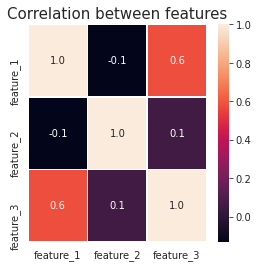

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(card_details_test[tot_features].corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.title('Correlation between features', fontsize=15)
plt.show()

### **Chi-Square Test**

In [ ]:
print('--------------------------------------Summary of Chi-Square Test------------------------------------')
x = PrettyTable(['S.No','FEATURE 1', 'FEATURE 2', 'P-VALUE', 'STATUS'])

s_no = 1
for f1 in cat_features:
  for f2 in cat_features:
    if f1 == f2:
      continue
    else:
      ct = pd.crosstab(card_details_test[f1], card_details_test[f2])
      chi_val, p_value, dof, expected = chi2_contingency(ct)
      alpha = 0.05
      if p_value <= alpha:
        status = 'Reject NULL Hypothesis'
      else:
        status = 'Accept NULL Hypothesis'
      x.add_row([s_no, f1, f2, p_value, status])
      s_no = s_no + 1
print(x)

--------------------------------------Summary of Chi-Square Test------------------------------------
+------+--------------------+--------------------+------------------------+------------------------+
| S.No |     FEATURE 1      |     FEATURE 2      |        P-VALUE         |         STATUS         |
+------+--------------------+--------------------+------------------------+------------------------+
|  1   | first_active_month |     feature_1      |          0.0           | Reject NULL Hypothesis |
|  2   | first_active_month |     feature_2      |          0.0           | Reject NULL Hypothesis |
|  3   | first_active_month |     feature_3      |          0.0           | Reject NULL Hypothesis |
|  4   |     feature_1      | first_active_month |          0.0           | Reject NULL Hypothesis |
|  5   |     feature_1      |     feature_2      |          0.0           | Reject NULL Hypothesis |
|  6   |     feature_1      |     feature_3      |          0.0           | Reject NULL Hyp

<a name='section3.3'><a/>
## 3.3. Dataset 3: merchant_details

In [ ]:
tot_features = ['merchant_id', 'merchant_group_id', 'merchant_category_id',
                'subsector_id', 'numerical_1', 'numerical_2', 'category_1',
                'most_recent_sales_range', 'most_recent_purchases_range',
                'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
                'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
                'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12',
                'category_4', 'city_id', 'state_id', 'category_2']
cat_features = ['category_1','most_recent_sales_range','most_recent_purchases_range','category_4','category_2']
num_features = ['avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
                'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
                'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12']

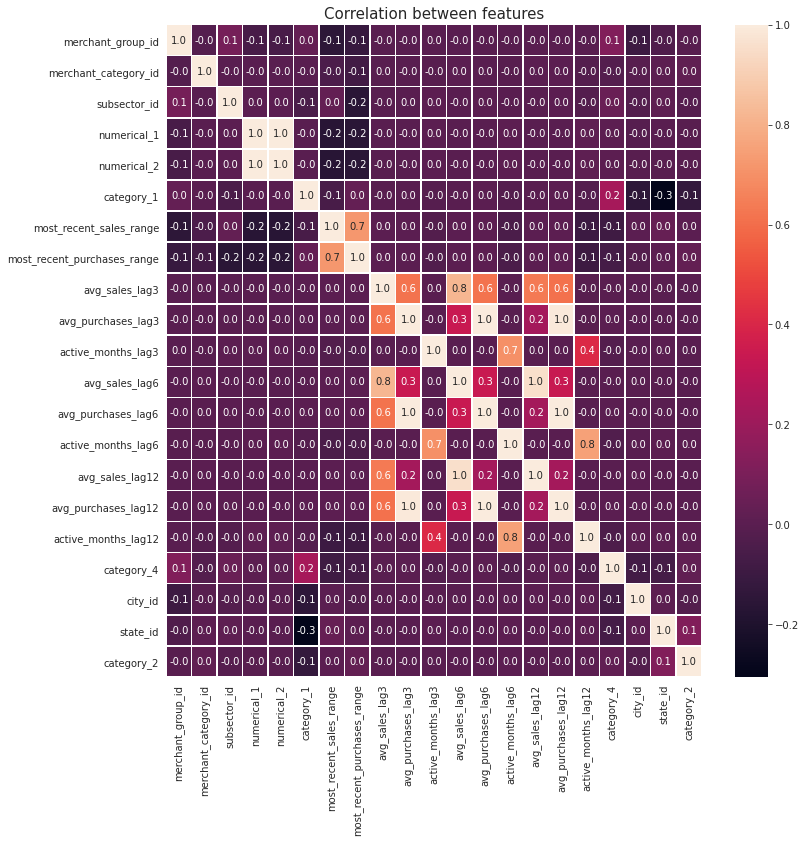

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(merchant_details[tot_features].corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.title('Correlation between features', fontsize=15)
plt.show()

### **Pearson Correlation**

In [ ]:
print('----------------------------------Summary of Pearson Correlation------------------------------------')
x = PrettyTable(['S.No','FEATURE 1', 'FEATURE 2', 'P-VALUE', 'DIRECTION & STRENGTH', 'STATUS'])

s_no = 1
for f1 in num_features:
  for f2 in num_features:
    if f1 == f2:
      continue
    else:
      pcc = pearsonr(merchant_details[f1], merchant_details[f2])

      alpha = 0.05
      if pcc[1] <= alpha:
        status = 'Reject NULL Hypothesis'
      else:
        status = 'Accept NULL Hypothesis'

      x.add_row([s_no, f1, f2, str(np.round(pcc[1], 5)), str(np.round(pcc[0], 5)), status])
      s_no = s_no + 1
print(x)  

----------------------------------Summary of Pearson Correlation------------------------------------
+------+---------------------+---------------------+---------+----------------------+------------------------+
| S.No |      FEATURE 1      |      FEATURE 2      | P-VALUE | DIRECTION & STRENGTH |         STATUS         |
+------+---------------------+---------------------+---------+----------------------+------------------------+
|  1   |    avg_sales_lag3   |  avg_purchases_lag3 |   0.0   |       0.61649        | Reject NULL Hypothesis |
|  2   |    avg_sales_lag3   |  active_months_lag3 | 0.86415 |        0.0003        | Accept NULL Hypothesis |
|  3   |    avg_sales_lag3   |    avg_sales_lag6   |   0.0   |       0.81802        | Reject NULL Hypothesis |
|  4   |    avg_sales_lag3   |  avg_purchases_lag6 |   0.0   |       0.61413        | Reject NULL Hypothesis |
|  5   |    avg_sales_lag3   |  active_months_lag6 | 0.37866 |       -0.00152       | Accept NULL Hypothesis |
|  6   |   

### **Chi-Square Test**

In [ ]:
print('-----------------------------------------------Summary of Chi-Square Test----------------------------------------------')
x = PrettyTable(['S.No','FEATURE 1', 'FEATURE 2', 'P-VALUE', 'STATUS'])

s_no = 1
for f1 in cat_features:
  for f2 in cat_features:
    if f1 == f2:
      continue
    else:
      ct = pd.crosstab(merchant_details[f1], merchant_details[f2])
      chi_val, p_value, dof, expected = chi2_contingency(ct)
      alpha = 0.05
      if p_value <= alpha:
        status = 'Reject NULL Hypothesis'
      else:
        status = 'Accept NULL Hypothesis'
      x.add_row([s_no, f1, f2, p_value, status])
      s_no = s_no + 1
print(x)

-----------------------------------------------Summary of Chi-Square Test----------------------------------------------
+------+-----------------------------+-----------------------------+-------------------------+------------------------+
| S.No |          FEATURE 1          |          FEATURE 2          |         P-VALUE         |         STATUS         |
+------+-----------------------------+-----------------------------+-------------------------+------------------------+
|  1   |          category_1         |   most_recent_sales_range   |  3.286793732636619e-249 | Reject NULL Hypothesis |
|  2   |          category_1         | most_recent_purchases_range | 1.0798022169911082e-116 | Reject NULL Hypothesis |
|  3   |          category_1         |          category_4         |           0.0           | Reject NULL Hypothesis |
|  4   |          category_1         |          category_2         |           0.0           | Reject NULL Hypothesis |
|  5   |   most_recent_sales_range   |  

<a name='section3.4'><a/>
## 3.4. Dataset 4: old_transactions

In [ ]:
tot_features = ['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
                'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
                'purchase_amount', 'purchase_date', 'category_2', 'state_id',
                'subsector_id']
cat_features = ['authorized_flag','category_1','category_3']
num_features = ['installments','category_2','month_lag','purchase_amount']

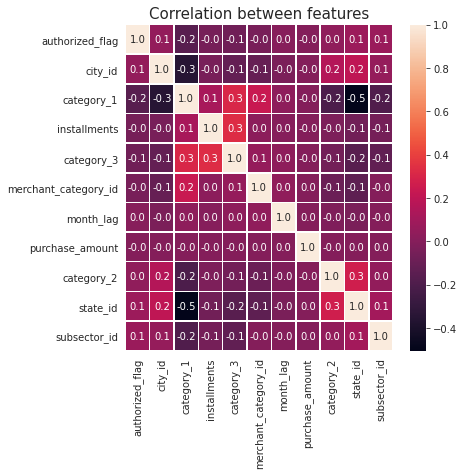

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(old_transactions[tot_features].corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.title('Correlation between features', fontsize=15)
plt.show()

### **Pearson Correlation**

In [ ]:
print('----------------------------------Summary of Pearson Correlation------------------------------------')
x = PrettyTable(['S.No','FEATURE 1', 'FEATURE 2', 'P-VALUE', 'DIRECTION & STRENGTH', 'STATUS'])

s_no = 1
for f1 in num_features:
  for f2 in num_features:
    if f1 == f2:
      continue
    else:
      pcc = pearsonr(old_transactions[f1], old_transactions[f2])

      alpha = 0.05
      if pcc[1] <= alpha:
        status = 'Reject NULL Hypothesis'
      else:
        status = 'Accept NULL Hypothesis'

      x.add_row([s_no, f1, f2, str(np.round(pcc[1], 5)), str(np.round(pcc[0], 5)), status])
      s_no = s_no + 1
print(x)  

----------------------------------Summary of Pearson Correlation------------------------------------
+------+-----------------+-----------------+---------+----------------------+------------------------+
| S.No |    FEATURE 1    |    FEATURE 2    | P-VALUE | DIRECTION & STRENGTH |         STATUS         |
+------+-----------------+-----------------+---------+----------------------+------------------------+
|  1   |   installments  |    category_2   |   0.0   |       -0.02315       | Reject NULL Hypothesis |
|  2   |   installments  |    month_lag    |   0.0   |        0.0034        | Reject NULL Hypothesis |
|  3   |   installments  | purchase_amount | 0.92406 |        -2e-05        | Accept NULL Hypothesis |
|  4   |    category_2   |   installments  |   0.0   |       -0.02315       | Reject NULL Hypothesis |
|  5   |    category_2   |    month_lag    |   0.0   |        -0.018        | Reject NULL Hypothesis |
|  6   |    category_2   | purchase_amount | 0.76534 |        -6e-05       

### **Chi-Square Test**

In [ ]:
print('---------------------------Summary of Chi-Square Test--------------------------')
x = PrettyTable(['S.No','FEATURE 1', 'FEATURE 2', 'P-VALUE', 'STATUS'])

s_no = 1
for f1 in cat_features:
  for f2 in cat_features:
    if f1 == f2:
      continue
    else:
      ct = pd.crosstab(old_transactions[f1], old_transactions[f2])
      chi_val, p_value, dof, expected = chi2_contingency(ct)
      alpha = 0.05
      if p_value <= alpha:
        status = 'Reject NULL Hypothesis'
      else:
        status = 'Accept NULL Hypothesis'
      x.add_row([s_no, f1, f2, p_value, status])
      s_no = s_no + 1
print(x)

---------------------------Summary of Chi-Square Test--------------------------
+------+-----------------+-----------------+---------+------------------------+
| S.No |    FEATURE 1    |    FEATURE 2    | P-VALUE |         STATUS         |
+------+-----------------+-----------------+---------+------------------------+
|  1   | authorized_flag |    category_1   |   0.0   | Reject NULL Hypothesis |
|  2   | authorized_flag |    category_3   |   0.0   | Reject NULL Hypothesis |
|  3   |    category_1   | authorized_flag |   0.0   | Reject NULL Hypothesis |
|  4   |    category_1   |    category_3   |   0.0   | Reject NULL Hypothesis |
|  5   |    category_3   | authorized_flag |   0.0   | Reject NULL Hypothesis |
|  6   |    category_3   |    category_1   |   0.0   | Reject NULL Hypothesis |
+------+-----------------+-----------------+---------+------------------------+


### **ANOVA Test**

In [ ]:
anova = smf.ols(formula='purchase_amount ~ C(authorized_flag)', data=old_transactions).fit()
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:        purchase_amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     95.25
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           1.68e-22
Time:                        06:37:55   Log-Likelihood:            -2.4580e+08
No. Observations:            29112361   AIC:                         4.916e+08
Df Residuals:                29112359   BIC:                         4.916e+08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
anova = smf.ols(formula='purchase_amount ~ C(category_1)', data=old_transactions).fit()
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:        purchase_amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3693
Date:                Sun, 27 Jun 2021   Prob (F-statistic):              0.543
Time:                        06:40:30   Log-Likelihood:            -2.4580e+08
No. Observations:            29112361   AIC:                         4.916e+08
Df Residuals:                29112359   BIC:                         4.916e+08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0715      0

In [ ]:
anova = smf.ols(formula='purchase_amount ~ C(category_3)', data=old_transactions).fit()
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:        purchase_amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.543
Date:                Sun, 27 Jun 2021   Prob (F-statistic):              0.214
Time:                        06:43:03   Log-Likelihood:            -2.4580e+08
No. Observations:            29112361   AIC:                         4.916e+08
Df Residuals:                29112358   BIC:                         4.916e+08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3585      0

In [ ]:
print('--------------------------Summary of ANOVA Test------------------------')
x = PrettyTable(['S.No', 'FEATURE 1', 'FEATURE 2', 'P-VALUE', 'STATUS'])

def check_status(p_value):
  alpha = 0.05
  if p_value <= alpha:
    status = 'Reject NULL Hypothesis'
  else:
    status = 'Accept NULL Hypothesis'
  return status

x.add_row([1,'authorized_flag','purchase_amount', 1.68e-22, check_status(1.68e-22)])
x.add_row([2,'category_1','purchase_amount', 0.543, check_status(0.543)])
x.add_row([3,'category_3','purchase_amount', 0.214, check_status(0.214)])
print(x)

--------------------------Summary of ANOVA Test------------------------
+------+-----------------+-----------------+----------+------------------------+
| S.No |    FEATURE 1    |    FEATURE 2    | P-VALUE  |         STATUS         |
+------+-----------------+-----------------+----------+------------------------+
|  1   | authorized_flag | purchase_amount | 1.68e-22 | Reject NULL Hypothesis |
|  2   |    category_1   | purchase_amount |  0.543   | Accept NULL Hypothesis |
|  3   |    category_3   | purchase_amount |  0.214   | Accept NULL Hypothesis |
+------+-----------------+-----------------+----------+------------------------+


<a name='section3.5'><a/>
## 3.5. Dataset 5: new_transactions

In [ ]:
tot_features = ['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
                'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
                'purchase_amount', 'purchase_date', 'category_2', 'state_id',
                'subsector_id']
cat_features = ['authorized_flag','category_1','category_3']
num_features = ['installments','category_2','month_lag','purchase_amount']

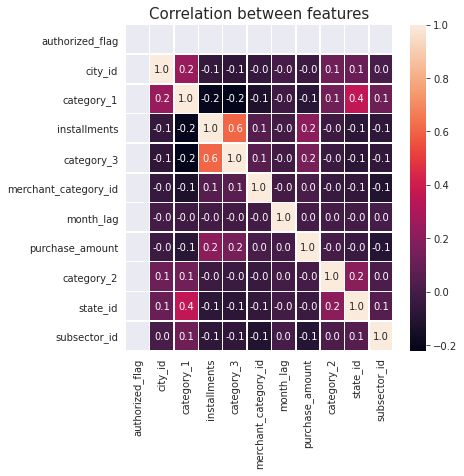

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(new_transactions[tot_features].corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.title('Correlation between features', fontsize=15)
plt.show()

### **Pearson Correlation**

In [ ]:
print('-----------------------------------Summary of Pearson Correlation-------------------------------------')
x = PrettyTable(['S.No','FEATURE 1', 'FEATURE 2', 'P-VALUE', 'DIRECTION & STRENGTH', 'STATUS'])

s_no = 1
for f1 in num_features:
  for f2 in num_features:
    if f1 == f2:
      continue
    else:
      pcc = pearsonr(new_transactions[f1], new_transactions[f2])

      alpha = 0.05
      if pcc[1] <= alpha:
        status = 'Reject NULL Hypothesis'
      else:
        status = 'Accept NULL Hypothesis'

      x.add_row([s_no, f1, f2, str(np.round(pcc[1], 5)), str(np.round(pcc[0], 5)), status])
      s_no = s_no + 1
print(x)  

-----------------------------------Summary of Pearson Correlation-------------------------------------
+------+-----------------+-----------------+---------+----------------------+------------------------+
| S.No |    FEATURE 1    |    FEATURE 2    | P-VALUE | DIRECTION & STRENGTH |         STATUS         |
+------+-----------------+-----------------+---------+----------------------+------------------------+
|  1   |   installments  |    category_2   |   0.0   |       -0.02799       | Reject NULL Hypothesis |
|  2   |   installments  |    month_lag    |   0.0   |       -0.0056        | Reject NULL Hypothesis |
|  3   |   installments  | purchase_amount |   0.0   |       0.20697        | Reject NULL Hypothesis |
|  4   |    category_2   |   installments  |   0.0   |       -0.02799       | Reject NULL Hypothesis |
|  5   |    category_2   |    month_lag    | 0.01253 |       0.00178        | Reject NULL Hypothesis |
|  6   |    category_2   | purchase_amount | 0.23213 |       -0.00085    

### **Chi-Square Test**

In [ ]:
print('---------------------------Summary of Chi-Square Test--------------------------')
x = PrettyTable(['S.No','FEATURE 1', 'FEATURE 2', 'P-VALUE', 'STATUS'])

s_no = 1
for f1 in cat_features:
  for f2 in cat_features:
    if f1 == f2:
      continue
    else:
      ct = pd.crosstab(new_transactions[f1], new_transactions[f2])
      chi_val, p_value, dof, expected = chi2_contingency(ct)
      alpha = 0.05
      if p_value <= alpha:
        status = 'Reject NULL Hypothesis'
      else:
        status = 'Accept NULL Hypothesis'
      x.add_row([s_no, f1, f2, p_value, status])
      s_no = s_no + 1
print(x)

---------------------------Summary of Chi-Square Test--------------------------
+------+-----------------+-----------------+---------+------------------------+
| S.No |    FEATURE 1    |    FEATURE 2    | P-VALUE |         STATUS         |
+------+-----------------+-----------------+---------+------------------------+
|  1   | authorized_flag |    category_1   |   1.0   | Accept NULL Hypothesis |
|  2   | authorized_flag |    category_3   |   1.0   | Accept NULL Hypothesis |
|  3   |    category_1   | authorized_flag |   1.0   | Accept NULL Hypothesis |
|  4   |    category_1   |    category_3   |   0.0   | Reject NULL Hypothesis |
|  5   |    category_3   | authorized_flag |   1.0   | Accept NULL Hypothesis |
|  6   |    category_3   |    category_1   |   0.0   | Reject NULL Hypothesis |
+------+-----------------+-----------------+---------+------------------------+


### **ANOVA Test**

In [ ]:
anova = smf.ols(formula='purchase_amount ~ C(authorized_flag)', data=new_transactions).fit()
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:        purchase_amount   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Sun, 27 Jun 2021   Prob (F-statistic):                nan
Time:                        06:34:23   Log-Likelihood:            -2.0684e+06
No. Observations:             1963021   AIC:                         4.137e+06
Df Residuals:                 1963020   BIC:                         4.137e+06
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5510      0.000  -1112.292      0.0

In [ ]:
anova = smf.ols(formula='purchase_amount ~ C(category_1)', data=new_transactions).fit()
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:        purchase_amount   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                 1.506e+04
Date:                Sun, 27 Jun 2021   Prob (F-statistic):               0.00
Time:                        06:34:39   Log-Likelihood:            -2.0609e+06
No. Observations:             1963021   AIC:                         4.122e+06
Df Residuals:                 1963019   BIC:                         4.122e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.2187      0

In [ ]:
anova = smf.ols(formula='purchase_amount ~ C(category_3)', data=new_transactions).fit()
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:        purchase_amount   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                 6.159e+04
Date:                Sun, 27 Jun 2021   Prob (F-statistic):               0.00
Time:                        06:34:54   Log-Likelihood:            -2.0087e+06
No. Observations:             1963021   AIC:                         4.017e+06
Df Residuals:                 1963018   BIC:                         4.017e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.5930      0

In [ ]:
print('--------------------------Summary of ANOVA Test------------------------')
x = PrettyTable(['S.No', 'FEATURE 1', 'FEATURE 2', 'P-VALUE', 'STATUS'])

def check_status(p_value):
  alpha = 0.05
  if p_value == 'nan' or p_value <= alpha:
    status = 'Reject NULL Hypothesis'
  else:
    status = 'Accept NULL Hypothesis'
  return status

x.add_row([1,'authorized_flag','purchase_amount', 'nan', check_status('nan')])
x.add_row([2,'category_1','purchase_amount', 0.00, check_status(0.00)])
x.add_row([3,'category_3','purchase_amount', 0.00, check_status(0.00)])
print(x)

--------------------------Summary of ANOVA Test------------------------
+------+-----------------+-----------------+---------+------------------------+
| S.No |    FEATURE 1    |    FEATURE 2    | P-VALUE |         STATUS         |
+------+-----------------+-----------------+---------+------------------------+
|  1   | authorized_flag | purchase_amount |   nan   | Reject NULL Hypothesis |
|  2   |    category_1   | purchase_amount |   0.0   | Reject NULL Hypothesis |
|  3   |    category_3   | purchase_amount |   0.0   | Reject NULL Hypothesis |
+------+-----------------+-----------------+---------+------------------------+




---



# References:

*   https://www.kaggle.com/c/elo-merchant-category-recommendation
*   https://stackoverflow.com/
*   https://seaborn.pydata.org/

